<a href="https://colab.research.google.com/github/kleber293/Metodos_Colab/blob/main/Metodo_de_Runge_Kutta_e_outras_aproximacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MÉTODO DE RUNGE_KUTTA DE 4º ORDEM

Os metódos de Runge Kutta se aproximam mais da curva solução da EDO, quanto maior a ordem do método mais a curva se aproxima da curva da solução basiadas na equação abaixo.

<center> $y_{i+1}=y_i+\text{Inclinação}\cdot h$ </center>

Este metodo se dá por meio da inclinação da EDO, assim como o método de Euler, diferenciando a partir da segunda ordem que tem a inclinação em dois pontos, terceira ordem em três pontos e assim sucessivamente. Associadas a uma expanção em serie de Taylor.

<center> <img src='https://lh3.googleusercontent.com/proxy/KlkjNkx47o2hSaC497-FUpoZnvtK-zich6seTLbMrw_kp-Kc1RcW5cexqN8_A3H3KhrtY6yNiF7AhzkbjmcC2r_IQIzA5s-Hkrfmoz9ebdRhOW4NY_r7FGnC') </center>

---

## PROBLEMA PROPOSTO

Traçar uma curva aproximada á EDO abaixo, na qual um dos pontos se encontra em $(0, 1)$
<center> $f'(x,\:y) = x + y$ </center>

---


In [175]:
#@markdown ## Chamando as bibliotecas
import matplotlib.pyplot as mat
import numpy as n

In [176]:
#@markdown ### Definindo as funções que vamos utilizar
def g(x, y):
    FUNCTION = x+y #@param {type:"raw"}  
    return FUNCTION

APROXIMACOES = True #@param {type:"boolean"}

if APROXIMACOES:
    def euler(x0, y0, h):
        t1 = g(x0, y0)
        y1 = y0 + h*t1
        return y1

    def euler_modificado(x0, y0, h):
        t1 = g(x0, y0)
        t2 = g(x0+h, y0 + h*g(x0, y0))
        y1 = y0 + h/2*( t1 + t2 )
        return y1

    def metodo_do_ponto_central(x0, y0, h):
        t1 = g(x0, y0)
        y1 = y0 + h*g(x0+h/2, y0 + h/2*t1) 
        return y1


In [177]:
#@markdown ### Definindo as constantes a2 e b21.
def metodo_de_runge_kutta_2_ordem(x0, y0, h):
    c1 = 1/2 #@param {type:"raw"}
    c2 = 1/2 #@param {type:"raw"}

    a2 = 1 #@param {type:"raw"}
    
    b21 = 1 #@param {type:"raw"}

    k1 = g(x0, y0)
    k2 = g(x0 + a2*h, y0 + b21*k1*h)

    y1 = y0 + h*( c1*k1 + c2*k2 )
    return y1


In [178]:
#@markdown ### Definindo as constantes a2 e b21.
def metodo_de_runge_kutta_3_ordem(x0, y0, h):
    c1 = 1/6 #@param {type:"raw"}
    c2 = 4/6 #@param {type:"raw"}
    c3 = 1/6 #@param {type:"raw"}

    a2 = 1/2 #@param {type:"raw"}
    a3 = 1 #@param {type:"raw"}

    b21 = 1/2 #@param {type:"raw"}
    
    b31 = -1 #@param {type:"raw"}
    b32 = 2 #@param {type:"raw"}

    k1 = g(x0, y0)
    k2 = g(x0 + a2*h, y0 + b21*k1*h)
    k3 = g(x0 + a3*h, y0 + b31*k1*h + b32*k2*h)

    y1 = y0 + h*( c1*k1 + c2*k2 + c3*k3 )
    return y1


In [179]:
#@markdown ### Definindo as constantes a2 e b21.
def metodo_de_runge_kutta_4_ordem(x0, y0, h):
    c1 = 1/6 #@param {type:"raw"}
    c2 = 2/6 #@param {type:"raw"}
    c3 = 2/6 #@param {type:"raw"}
    c4 = 1/6 #@param {type:"raw"}    

    a2 = 1/2 #@param {type:"raw"}
    a3 = 1/2 #@param {type:"raw"}
    a4 = 1 #@param {type:"raw"}

    b21 = 1/2 #@param {type:"raw"}

    b31 = 0 #@param {type:"raw"}
    b32 = 1/2 #@param {type:"raw"}

    b41 = 0 #@param {type:"raw"}
    b42 = 0 #@param {type:"raw"}
    b43 = 1 #@param {type:"raw"}

    k1 = g(x0, y0)
    k2 = g(x0 + a2*h, y0 + b21*k1*h)
    k3 = g(x0 + a3*h, y0 + b31*k1*h + b32*k2*h)
    k4 = g(x0 + a4*h, y0 + b41*k1*h + b42*k2*h + b43*k3*h)

    y1 = y0 + h*( c1*k1 + c2*k2 + c3*k3 + c4*k4 )
    return y1

In [180]:
#@markdown ### Definindo as váriaveis do problema com os seus valores iniciais
x = [0] #@param {type:"raw"}
y = [1] #@param {type:"raw"}

x0 = [x[0]]

if APROXIMACOES:
    y0, y1, y2 = [y[0]], [y[0]], [y[0]]

y3, y4, y5 = [y[0]], [y[0]], [y[0]]

In [181]:
#@markdown ### Criando uma lista de pontos que a função assume ao percorrer
#@markdown ### a formula sobre a reta tangente a solução.
QUANTIDADE = 30 #@param {type:"slider", min:0, max:1000, step:10}
PASSO = 0.51 #@param {type:"slider", min:0.01, max:1, step:0.01}

if APROXIMACOES:
    for i in range(QUANTIDADE):
        x0.append(x0[i]+PASSO)
        y0.append(euler(x0[i], y0[i], PASSO))
        y1.append(euler_modificado(x0[i], y1[i], PASSO))
        y2.append(metodo_do_ponto_central(x0[i], y2[i], PASSO))

for i in range(QUANTIDADE):
    y3.append(metodo_de_runge_kutta_2_ordem(x0[i], y3[i], PASSO))
    y4.append(metodo_de_runge_kutta_3_ordem(x0[i], y4[i], PASSO))
    y5.append(metodo_de_runge_kutta_4_ordem(x0[i], y5[i], PASSO))

## CAIXAS DE EXPEÇÃO TIPO GRÁFICOS

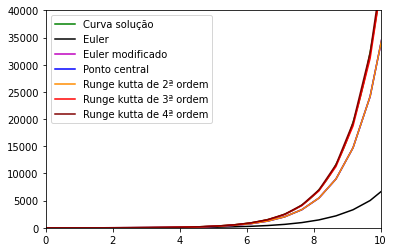

In [182]:
#@markdown ### A nivel de comparação

CURVA_SOLUCAO = True #@param {type:"boolean"}
MÉTODO_DE_EULER = True #@param {type:"boolean"}
MÉTODO_DE_EULER_MODIFICADO = True #@param {type:"boolean"}
METODO_DO_PONTO_CENTRAL = True #@param {type:"boolean"}
METODO_DE_RUNGE_KUTTA_2ª_ORDEM = True #@param {type:"boolean"}
METODO_DE_RUNGE_KUTTA_3ª_ORDEM = True #@param {type:"boolean"}
METODO_DE_RUNGE_KUTTA_4ª_ORDEM = True #@param {type:"boolean"}

mat.ylim(0, 40000)
mat.xlim(0, 10)

if CURVA_SOLUCAO: # Curva solução (VERDE)
    t = n.arange(0, 10, 0.1)
    mat.plot(t, -t-1+2*n.exp(t), color='g', label='Curva solução')

if APROXIMACOES:
    if MÉTODO_DE_EULER: # Curva aproximada, Euler (PRETO)
        mat.plot(x0, y0, color='k', label='Euler') 

    if MÉTODO_DE_EULER_MODIFICADO: # Curva aproximada, euler_modificado (ROSA)
        mat.plot(x0, y1, color='m', label='Euler modificado')

    if METODO_DO_PONTO_CENTRAL: # Curva aproximada, Ponto central (AZUL)
        mat.plot(x0, y2, color='b', label='Ponto central')

if METODO_DE_RUNGE_KUTTA_2ª_ORDEM: # Curva aproximada, Ponto central (LARANJA)
        mat.plot(x0, y3, color='darkorange', label='Runge kutta de 2ª ordem')

if METODO_DE_RUNGE_KUTTA_3ª_ORDEM: # Curva aproximada, Ponto central (VERMELHO)
        mat.plot(x0, y4, color='red', label='Runge kutta de 3ª ordem')

if METODO_DE_RUNGE_KUTTA_4ª_ORDEM: # Curva aproximada, Ponto central (MAROM)
        mat.plot(x0, y5, color='maroon', label='Runge kutta de 4ª ordem')

mat.legend()
mat.show()
